# Statistics Review: Point Estimation & Confidence Intervals

#### *4 October 2019*
#### *DATA 1010*

In [1]:
using Plots, Distributions

The central problem of statistics is to make inferences about a population or data-generating process based on the information in a finite sample drawn from the population. Last class we talked about kernel density estimation, which directly estimates the distribution. Today we'll talk about estimating values which boil the distribution down to a single number.

---

**Point estimation** is the inference of a single real-valued feature of the distribution of the data-generating process (such as its mean, variance, or median).

## Problem 1

Run the code below to define a function called `mysteryRV` which can be called (with no arguments) to sample from an unknown distribution. Also defined is a function `check_mean` which can be called with a single argument to check whether the supplied value is close to the mean of the underlying distribution. Figure out how to ascertain the mean accurately enough to get `check_mean` to respond affirmatively. Repeat with `check_var` (also defined in "mystery-distribution.jl").

In [2]:
include("mystery-distribution.jl")

mysteryRV (generic function with 1 method)

In [3]:
mysteryRV()

2.578219135012265

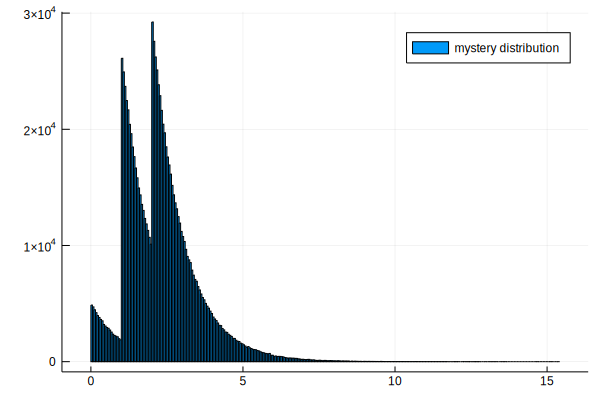

In [4]:
histogram([[mysteryRV() for _ in 1:1_000_000]], label="mystery distribution")

In [6]:
# Technique of Monte Carlo
μ = mean(mysteryRV() for _ in 1:1_000_000)

2.299981184848545

In [7]:
check_mean(2.29)

"correct! The mean is 2.3"

In [8]:
mean((mysteryRV()-μ)^2 for _ in 1:1_000_000)

1.4105190897586166

In [9]:
check_var(1.407)

"correct! The variance is 1.41"

---

A **statistical functional** is any function $T$ from the set of distributions to $[-\infty,\infty]$. An **estimator** $\widehat{\theta}$ is a random variable defined in terms of $n$ i.i.d. random variables, the purpose of which is to approximate some statistical functional of the random variables’ common distribution. 

*Example: Suppose that $T(\nu)$ = the mean of $\nu$, and that $\widehat{\theta} = \frac{(X_1 + \cdots + X_n)}{n}$.*

## Problem 2

(a) Suppose that $X$  is an integer-valued random variable, and that $T$ is defined to the units digit of $X$. Is $T$ a statistical functional? 

(b) Suppose that for any probability measure $\nu$ on the plane, $T(\nu)$ is defined to be the expected squared distance between two points drawn independently from $\nu$. Is $T$ a statistical functional? Is $\widehat{\theta}(\mathbf{X}_1, \ldots, \mathbf{X}_n) = |\mathbf{X}_1|$ an estimator of $T$?

(c) Come up with your own statistical functional (unique enough that it can't be boiled down to a single word). 

*Solution:*  
(a) No. It's a random variable. Statistical functional does not involve randomness.  
(b) Yes. It is a statistical functional, since it acts on probability measures and return all numbers.  
(c) Yes. $\widehat{\theta}$ is an estimator (a bad one)

---

## Problem 3

The **empirical measure** associated with a given set of observations is the discrete probability measure which assigns a probability mass of $\frac{1}{n}$ to the location of each of the observations in the sample. 

The **plug-in estimator** of a statistical functional $T$ is the random variable $T(\widehat{\nu})$, where $\widehat{\nu}$ is the empirical measure. 

(a) Is the empirical measure random (in other words, if we collected a fresh set of observations, would we get the same measure)? Is the underlying probability measure used to generation the observations random?  
(b) Why is the empirical measure useless when it comes to estimating the conditional expectation of $Y$ given $X$, assuming that the joint distribution of $X$ and $Y$ is represented by a density function?  
(c) Is the sample mean a plug-in estimator?

*Solution:*  
(a) Yes. it is random. No  
(b) 

---

### Bias

Given a distribution $\nu$ and a statistical functional $T$, let $\theta = T(\nu)$. The **bias** of an estimator of $\theta$ is the difference between the estimator’s expected value and $\theta$.

*Example: The expectation of the sample mean $\widehat{\theta} = \frac{(X_1 + \cdots + X_n)}{n}$ is $\frac{\mathbb{E}(X_1 + \cdots + X_n)}{n} = \mathbb{E}[\nu],$ so the bias of the sample mean is zero.*

## Problem 4

Compute the sample mean for five observations from the uniform distribution on $[0,1]$. Repeat a million times and make a histogram of the resulting million sample mean values. Does the sample mean appear to be unbiased?

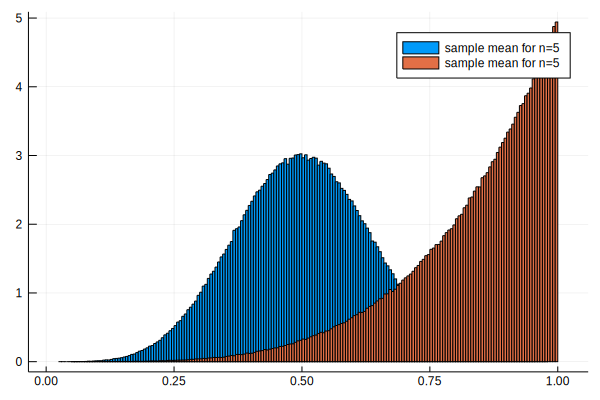

In [17]:
N = 10^6
histogram([mean(rand() for _ in 1:5) for _ in 1:N], label="sample mean for n=5", normed=true)
histogram!([maximum(rand() for _ in 1:5) for _ in 1:N], label="sample mean for n=5", normed=true) # sample maximum, negative bias

## Problem 6

Compute the sample maximum (that is, the plug-in estimator for the distribution maximum) for five observations from the uniform distribution on $[0,1]$. Repeat a million times and make a histogram of the resulting million sample maximum values. Does the sample mean appear to be unbiased?

The **standard error** of an estimator is its standard deviation.  

## Problem 7

Estimate the standard error of the sample maximum estimator (same as the previous problem: five observations from the uniform distribution on [0,1]). 

In [6]:
check_var_sample_max(0.01)

"not close enough!"

An estimator is **consistent** if $\widehat{\theta} \to \theta$ in probability as $n\to\infty$. This happens if and only if both the bias and the standard error go to zero as $n\to\infty$.

---
# Confidence Intervals

## Problem 8

(a) Approximate the mean of the distribution which generated the values stored in the vector `mysample`. 

In [7]:
mysample

10-element Array{Float64,1}:
 -0.3158449050816192
  1.0231649888798504
  1.9117770902002116
  2.504598442341676 
  4.968809090699897 
 -2.4899557184464394
  3.0741347708680196
  5.148240637619786 
  2.101505157727294 
  1.3321877268998883

(b) If one were to propose that the mean of the underlying distribution that generated these data is 2, would you find that implausible? How about 6?

---

**Confidence intervals** are estimators with error bars. In other words, rather than returning a single value as our estimator, we return an entire interval together with a confidence level $1-\alpha$. We're saying that the probability that that interval traps the true value of the statistical functional is at least $1-\alpha$.


## Problem 9

The distribution that the entries of `mysample` were drawn from is normal with unknown mean $\mu$ and variance $\sigma^2$. The distribution of the sample mean is therefore also normal. Use this information find a 95% confidence interval for the mean $\mu$.

In [8]:
mysample

10-element Array{Float64,1}:
 -0.3158449050816192
  1.0231649888798504
  1.9117770902002116
  2.504598442341676 
  4.968809090699897 
 -2.4899557184464394
  3.0741347708680196
  5.148240637619786 
  2.101505157727294 
  1.3321877268998883

In [9]:
mean(mysample), std(mysample)

(1.9258617281708563, 2.285698852959919)

---

## Problem 10

Write a function which accepts a vector as an argument, returns a 95\% confidence interval for the mean of the distribution that the observations in the vector were drawn from (using the normal approximation). Run the function `traps_mean` several times to see whether your confidence interval does trap the true mean about 95% of the time.

In [10]:
function confidence_interval_mean(X)
    # ADD CODE HERE
end

confidence_interval_mean (generic function with 1 method)

In [11]:
traps_mean(confidence_interval_mean)

X is [-4.46, -6.1, -7.38, -7.09, -6.43]


ArgumentError: ArgumentError: `nothing` should not be printed; use `show`, `repr`, or custom output instead.

---

## Problem 11

Write a function which accepts a vector as an argument, returns a 95\% confidence interval for the maximum of the distribution that the observations in the vector were drawn from (using the assumption that the distribution is uniform on $[0,b]$ for some unknown $b$.). Run the function `traps_max` several times to see whether your confidence interval does trap the true mean about 95% of the time.

In [12]:
function confidence_interval_max(X)
    # ADD CODE HERE
end

confidence_interval_max (generic function with 1 method)

In [13]:
traps_max(confidence_interval_max)

X is [2.62, 5.66, 0.08, 2.18, 6.4, 0.46, 7.19, 0.8, 1.42, 1.87, 4.75]


ArgumentError: ArgumentError: `nothing` should not be printed; use `show`, `repr`, or custom output instead.